In [ ]:
!pip install opencv-python numpy


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

<ipython-input-7-a9720dc77e18>:13: RuntimeWarning: invalid value encountered in divide
  ndvi = (red_channel - blue_channel) / (red_channel + blue_channel)


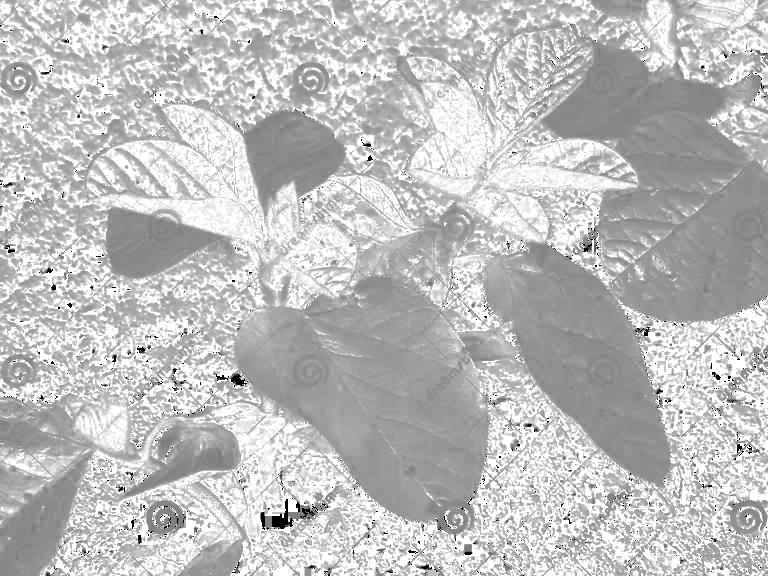

In [ ]:

# Carregue a imagem
imagem = cv2.imread('/content/plantas-pequenas-da-soja-38217778.webp')  # Substitua 'imagem_planta.jpg' pelo caminho da sua imagem

# Divida os canais da imagem (Red, Green, Blue)
blue_channel, green_channel, red_channel = cv2.split(imagem)

# Converta os canais para float para evitar problemas com divisões
blue_channel = blue_channel.astype(float)
green_channel = green_channel.astype(float)
red_channel = red_channel.astype(float)

# Calcule o NDVI
ndvi = (red_channel - blue_channel) / (red_channel + blue_channel)

# Mapeie os valores de NDVI para 0-255
ndvi = ((ndvi + 1) * 127.5).astype(np.uint8)

# Visualize o NDVI
cv2_imshow(ndvi)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import pandas as pd

# Suponha que você já tenha calculado o NDVI e armazenado em 'ndvi'

# Criar um DataFrame do Pandas com os valores NDVI
df = pd.DataFrame({'NDVI': ndvi.flatten()})  # Usando flatten() para transformar em uma única coluna

# Salvar o DataFrame em um arquivo CSV
df.to_csv('ndvi_values.csv', index=False)


In [ ]:
df = pd.read_csv('/content/ndvi_values.csv')

In [ ]:
df.head()

,NDVI
0,188
1,181
2,195
3,212
4,204


In [ ]:
import numpy as np
import cv2
import pandas as pd

# Carregue a imagem da planta (deve ser uma imagem de infravermelho próximo e vermelho)
imagem = cv2.imread('/content/plantas-pequenas-da-soja-38217778.webp')

# Converta a imagem para float32 para cálculos precisos
imagem = imagem.astype(np.float32)

# Extraia os canais de infravermelho próximo (NIR) e vermelho (RED)
nir = imagem[:, :, 0]
red = imagem[:, :, 2]

# Calcule os índices de vegetação
ndvi = (nir - red) / (nir + red)
evi = 2.5 * ((nir - red) / (nir + 6 * red - 7.5))
savi = ((nir - red) / (nir + red + 0.5)) * 1.5

# Crie um DataFrame com os resultados
df = pd.DataFrame({'NDVI': ndvi.ravel(), 'EVI': evi.ravel(), 'SAVI': savi.ravel()})

# Salve o DataFrame em um arquivo CSV
df.to_csv('indices_vegetacao.csv', index=False)



<ipython-input-1-a5c3842b42a1>:16: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red) / (nir + red)


In [ ]:
df = pd.read_csv('/content/indices_vegetacao.csv')
df.head()

,NDVI,EVI,SAVI
0,-0.475177,-0.256312,-0.710247
1,-0.423729,-0.234522,-0.633803
2,-0.532164,-0.277947,-0.795918
3,-0.664234,-0.325232,-0.992727
4,-0.606557,-0.306038,-0.906122


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['NDVI'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['EVI'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['SAVI'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['NDVI'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['EVI'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['SAVI'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_6, *[[['NDVI', 'EVI'], ['EVI', 'SAVI']]], **{})
chart